## 1. Import Everything

### 1.1. Import Libraries

In [3]:
import math
import tensorflow as tf
import numpy as np
import pylab as plt
import pickle

### 1.2. Set Parameters

In [5]:
NUM_CLASSES = 10
IMG_SIZE = 32
NUM_CHANNELS = 3
learning_rate = 0.001
epochs = 10
batch_size = 128

seed = 10
np.random.seed(seed)
tf.set_random_seed(seed)

## 2. Define Helper Function

### 2.1. Helper Function for Loading Data

In [7]:
def load_data(file):
    with open(file, 'rb') as fo:
        try:
            samples = pickle.load(fo)
        except UnicodeDecodeError:  #python 3.x
            fo.seek(0)
            samples = pickle.load(fo, encoding='latin1')

    data, labels = samples['data'], samples['labels']

    data = np.array(data, dtype=np.float32)
    labels = np.array(labels, dtype=np.int32)

    
    labels_ = np.zeros([labels.shape[0], NUM_CLASSES])
    labels_[np.arange(labels.shape[0]), labels-1] = 1

    return data, labels_

### 2.2. Helper Function for CNN

In [9]:
def cnn(images):

    images = tf.reshape(images, [-1, IMG_SIZE, IMG_SIZE, NUM_CHANNELS])
    
    #Conv 1
    W1 = tf.Variable(tf.truncated_normal([9, 9, NUM_CHANNELS, 50], stddev=1.0/np.sqrt(NUM_CHANNELS*9*9)), name='weights_1')
    b1 = tf.Variable(tf.zeros([50]), name='biases_1')

    conv_1 = tf.nn.relu(tf.nn.conv2d(images, W1, [1, 1, 1, 1], padding='VALID') + b1)
    pool_1 = tf.nn.max_pool(conv_1, ksize= [1, 2, 2, 1], strides= [1, 2, 2, 1], padding='VALID', name='pool_1')

    dim = pool_1.get_shape()[1].value * pool_1.get_shape()[2].value * pool_1.get_shape()[3].value 
    pool_1_flat = tf.reshape(pool_1, [-1, dim])
	
    #Softmax
    W2 = tf.Variable(tf.truncated_normal([dim, NUM_CLASSES], stddev=1.0/np.sqrt(dim)), name='weights_3')
    b2 = tf.Variable(tf.zeros([NUM_CLASSES]), name='biases_3')
    logits = tf.matmul(pool_1_flat, W2) + b2

    return logits

## 3. Handle Data and Model

### 3.1. Load in Data

In [10]:
trainX, trainY = load_data('./resource/data_batch_1')
print(trainX.shape, trainY.shape)

testX, testY = load_data('./resource/test_batch_trim')
print(testX.shape, testY.shape)

trainX = (trainX - np.min(trainX, axis = 0))/np.max(trainX, axis = 0)

(10000, 3072) (10000, 10)
(2000, 3072) (2000, 10)


### 3.2. Create the Model

In [11]:
x = tf.placeholder(tf.float32, [None, IMG_SIZE*IMG_SIZE*NUM_CHANNELS])
y_ = tf.placeholder(tf.float32, [None, NUM_CLASSES])


logits = cnn(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=logits)
loss = tf.reduce_mean(cross_entropy)

train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

N = len(trainX)
idx = np.arange(N)

## 4. RUN!!!!

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for e in range(epochs):
        np.random.shuffle(idx)
        trainX, trainY = trainX[idx], trainY[idx]

        _, loss_ = sess.run([train_step, loss], {x: trainX, y_: trainY})

        print('epoch', e, 'entropy', loss_)

epoch 0 entropy 2.337667
epoch 1 entropy 2.3298616
epoch 2 entropy 2.3233454
epoch 3 entropy 2.3178673
epoch 4 entropy 2.3132331
epoch 5 entropy 2.30929
epoch 6 entropy 2.3059082
epoch 7 entropy 2.3029902
epoch 8 entropy 2.3004522
epoch 9 entropy 2.2982311


## 5. Plot Graph

In [14]:
ind = np.random.randint(low=0, high=10000)
X = trainX[ind,:]

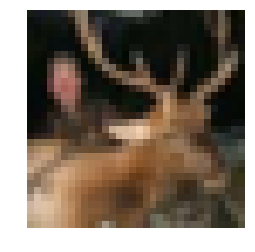

In [15]:
plt.figure()
plt.gray()
X_show = X.reshape(NUM_CHANNELS, IMG_SIZE, IMG_SIZE).transpose(1, 2, 0)
plt.axis('off')
plt.imshow(X_show)
plt.savefig('./p1b_2.png')